# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01��██████████████▍             | 21.4 MB 1.0 MB/s eta 0:00:16.1 MB 1.0 MB/s eta 0:00:09
     |████████████████████████████████| 19.3 MB 52.3 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 60.9 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 6.7 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 75.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 77.7 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 72.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 56.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.3 MB/s eta 0:00:01
     |█

     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=95d64e2e051bfbccae830b90204b9947a7ad198ed425e6bc9a58997dfe708759
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [4]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install tqdm


Defaulting to user installation because normal site-packages is not writeable
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Defaulting to user installation because normal site-packages is not writeable


In [5]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np




## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [6]:
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# Define transforms
transform = transforms.ToTensor()

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=100)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


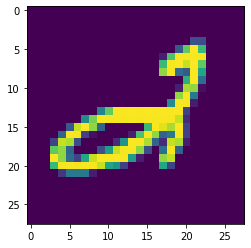

6


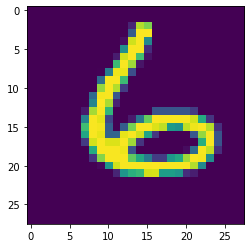

0


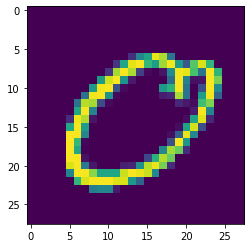

6


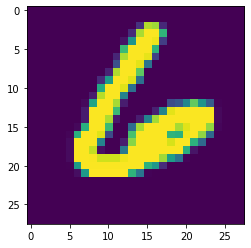

6


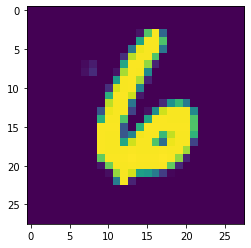

Training set size: 60000
Test set size: 10000
Image shape: torch.Size([1, 28, 28])
Label: 5


In [8]:
# Explore data

show5(train_loader)
# Explore dimensions of the dataset
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))
image, label = train_data[0]
print("Image shape:", image.shape)
print("Label:", label)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST digits
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SimpleNN()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Instantiate the model
model = SimpleNN()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST digits
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the training function
def train_model(model, optimizer, criterion, train_loader, num_epochs, device):
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()   # Clear the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute the loss
            loss.backward()  # Backpropagate the error
            optimizer.step()  # Update the model parameters

            running_loss += loss.item()
            if batch_idx % 250 == 249:  # Print every 250 mini-batches
                print(f'Epoch: {epoch+1}, Batch: {batch_idx+1}, Avg. Loss: {running_loss/250:.4f}')
                running_loss = 0.0

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images
])

# Load data
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100)

# Set up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create the model and move it to the GPU if available
model = SimpleNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




Plot the training loss (and validation loss/accuracy, if recorded).

In [17]:
# Train the model
num_epochs = 10
train_model(model, optimizer, criterion, train_loader, num_epochs, device)

Epoch: 1, Batch: 250, Avg. Loss: 0.6034
Epoch: 1, Batch: 500, Avg. Loss: 0.3193
Epoch: 2, Batch: 250, Avg. Loss: 0.2311
Epoch: 2, Batch: 500, Avg. Loss: 0.1929
Epoch: 3, Batch: 250, Avg. Loss: 0.1567
Epoch: 3, Batch: 500, Avg. Loss: 0.1432
Epoch: 4, Batch: 250, Avg. Loss: 0.1171
Epoch: 4, Batch: 500, Avg. Loss: 0.1162
Epoch: 5, Batch: 250, Avg. Loss: 0.1054
Epoch: 5, Batch: 500, Avg. Loss: 0.0979
Epoch: 6, Batch: 250, Avg. Loss: 0.0885
Epoch: 6, Batch: 500, Avg. Loss: 0.0841
Epoch: 7, Batch: 250, Avg. Loss: 0.0733
Epoch: 7, Batch: 500, Avg. Loss: 0.0778
Epoch: 8, Batch: 250, Avg. Loss: 0.0643
Epoch: 8, Batch: 500, Avg. Loss: 0.0681
Epoch: 9, Batch: 250, Avg. Loss: 0.0582
Epoch: 9, Batch: 500, Avg. Loss: 0.0614
Epoch: 10, Batch: 250, Avg. Loss: 0.0566
Epoch: 10, Batch: 500, Avg. Loss: 0.0542


In [22]:
def train_model(model, optimizer, criterion, train_loader, num_epochs, device):
    model.train()  # Set the model to training mode
    train_loss_history = []  # Initialize a list to store the average loss of each epoch
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()  # Clear the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute the loss
            loss.backward()  # Backpropagate the error
            optimizer.step()  # Update the model parameters

            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        train_loss_history.append(epoch_loss)
        print(f'Epoch: {epoch+1}, Avg. Loss: {epoch_loss:.4f}')
    
    return train_loss_history
train_loss_history = train_model(model, optimizer, criterion, train_loader, num_epochs, device)


Epoch: 1, Avg. Loss: 0.0508
Epoch: 2, Avg. Loss: 0.0455
Epoch: 3, Avg. Loss: 0.0432
Epoch: 4, Avg. Loss: 0.0390
Epoch: 5, Avg. Loss: 0.0382
Epoch: 6, Avg. Loss: 0.0349
Epoch: 7, Avg. Loss: 0.0309
Epoch: 8, Avg. Loss: 0.0317
Epoch: 9, Avg. Loss: 0.0264
Epoch: 10, Avg. Loss: 0.0279


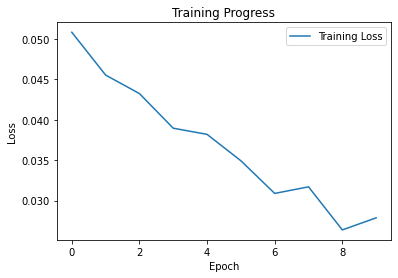

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_loss_history, label='Training Loss')
plt.title("Training Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

Epoch 1 test accuracy: 12.13% validation loss: 2.30548
Epoch 2 test accuracy: 24.26% validation loss: 4.61095
Epoch 3 test accuracy: 36.39% validation loss: 6.91643
Epoch 4 test accuracy: 48.52% validation loss: 9.22190
Epoch 5 test accuracy: 60.65% validation loss: 11.52738
Epoch 6 test accuracy: 72.78% validation loss: 13.83286
Epoch 7 test accuracy: 84.91% validation loss: 16.13833
Epoch 8 test accuracy: 97.04% validation loss: 18.44381
Epoch 9 test accuracy: 109.17% validation loss: 20.74929
Epoch 10 test accuracy: 121.30% validation loss: 23.05476


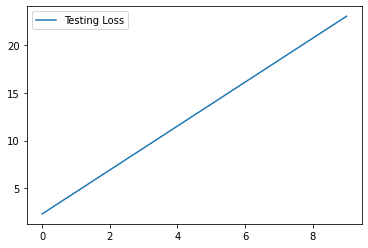

In [24]:
# Load the test dataset
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'net' and 'criterion' are already defined and properly initialized
net.to(device)
net.eval()

test_loss = 0.0
test_correct = 0
test_loss_history = []

# Testing loop
for epoch in range(num_epochs):  # num_epochs should be defined, or replace it with a specific number if testing doesn't require epochs
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()

    # Calculate and print statistics after the epoch
    epoch_loss = test_loss / len(test_loader)
    epoch_accuracy = test_correct / len(test_data) * 100
    print(f'Epoch {epoch + 1} test accuracy: {epoch_accuracy:.2f}% validation loss: {epoch_loss:.5f}')
    test_loss_history.append(epoch_loss)

# Plotting the test loss history
import matplotlib.pyplot as plt
plt.plot(test_loss_history, label="Testing Loss")
plt.legend()
plt.show()

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch: 1, Avg. Loss: 0.4429
Epoch: 2, Avg. Loss: 0.2190
Epoch: 3, Avg. Loss: 0.1588
Epoch: 4, Avg. Loss: 0.1254
Epoch: 5, Avg. Loss: 0.1063
Epoch: 6, Avg. Loss: 0.0893
Epoch: 7, Avg. Loss: 0.0785
Epoch: 8, Avg. Loss: 0.0726
Epoch: 9, Avg. Loss: 0.0650
Epoch: 10, Avg. Loss: 0.0580


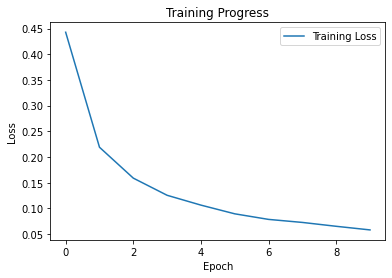

Test Loss: 0.0820, Test Accuracy: 97.42%
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 1e-05, 'nesterov': False, 'maximize': False, 'params': [0, 1, 2, 3, 4, 5]}]
Epoch: 1, Avg. Loss: 0.0381
Epoch: 2, Avg. Loss: 0.0334
Epoch: 3, Avg. Loss: 0.0305
Epoch: 4, Avg. Loss: 0.0274
Epoch: 5, Avg. Loss: 0.0260
Epoch: 6, Avg. Loss: 0.0232
Epoch: 7, Avg. Loss: 0.0218
Epoch: 8, Avg. Loss: 0.0195
Epoch: 9, Avg. Loss: 0.0186
Epoch: 10, Avg. Loss: 0.0179


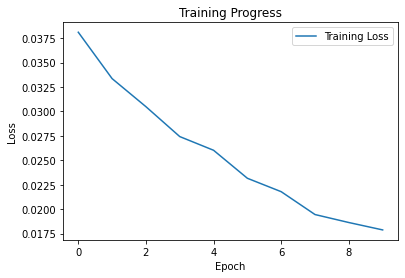

Test Loss: 0.0830, Test Accuracy: 97.81%


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST digits
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the training function
def train_model(model, optimizer, criterion, train_loader, num_epochs, device):
    model.train()  # Set the model to training mode
    train_loss_history = []  # Initialize a list to store the average loss of each epoch
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()  # Clear the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute the loss
            loss.backward()  # Backpropagate the error
            optimizer.step()  # Update the model parameters

            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        train_loss_history.append(epoch_loss)
        print(f'Epoch: {epoch+1}, Avg. Loss: {epoch_loss:.4f}')
    
    return train_loss_history

# Define the testing function
def test_model(model, criterion, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    test_correct = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            test_correct += (preds == labels).sum().item()
            test_loss += loss.item()
    
    test_loss /= len(test_loader)
    test_accuracy = test_correct / len(test_loader.dataset) * 100
    return test_loss, test_accuracy

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images
])

# Load data
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Create the model and move it to the GPU if available
model = SimpleNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
train_loss_history = train_model(model, optimizer, criterion, train_loader, num_epochs, device)

# Plot training loss history
plt.plot(train_loss_history, label='Training Loss')
plt.title("Training Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Test the model
test_loss, test_accuracy = test_model(model, criterion, test_loader, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Optionally, tweak hyperparameters and re-train
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# Re-train the model with the new optimizer
train_loss_history = train_model(model, optimizer, criterion, train_loader, num_epochs, device)

# Plot training loss history again
plt.plot(train_loss_history, label='Training Loss')
plt.title("Training Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Test the model again after re-training
test_loss, test_accuracy = test_model(model, criterion, test_loader, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


## Saving your model
Using `torch.save`, save your model for future loading.

In [28]:
# Save the state dictionary of the model
torch.save(net.state_dict(), 'model_state_dict.pth')